In [7]:
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.fftpack import ifft
from scipy.signal import boxcar, hamming, hann

22050
26103


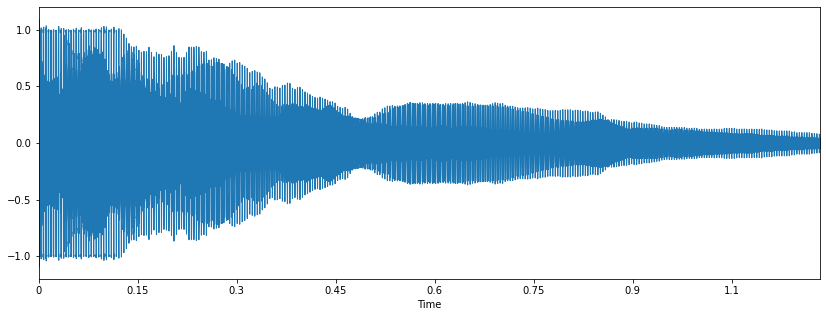

In [8]:
y, sr = librosa.load("piano5.wav")
print(sr)
print(len(y))

plt.figure(figsize=(14,5))
librosa.display.waveplot(y, sr=sr)

In [9]:
#Esantionare semnal
fereastra = int(80*1e-3*sr)
print(fereastra)

#Ajustam fereastra la o putere a lui 2
fereastra_fft = int(2**np.ceil(np.log2(fereastra)))
print("Fereastra FFT are %d esantioane" %fereastra_fft)

#Ferestre suprapuse
#Factorul de suprapunere
p=0
#Numar cadre suprapuse
numar_cadre_p = int(len(y)/(fereastra_fft*(1-p)))
print("Numarul de cadre este %d" %numar_cadre_p)

1764
Fereastra FFT are 2048 esantioane
Numarul de cadre este 12


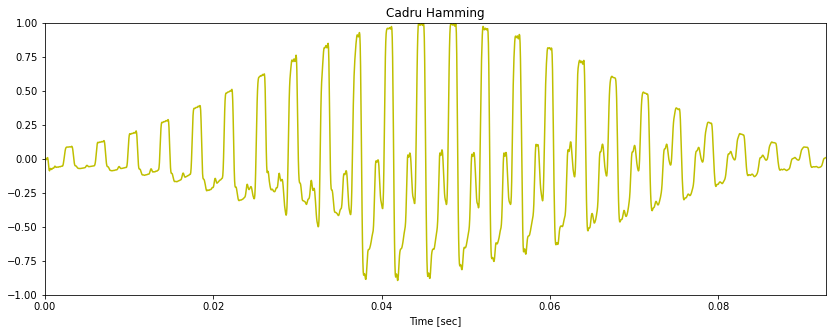

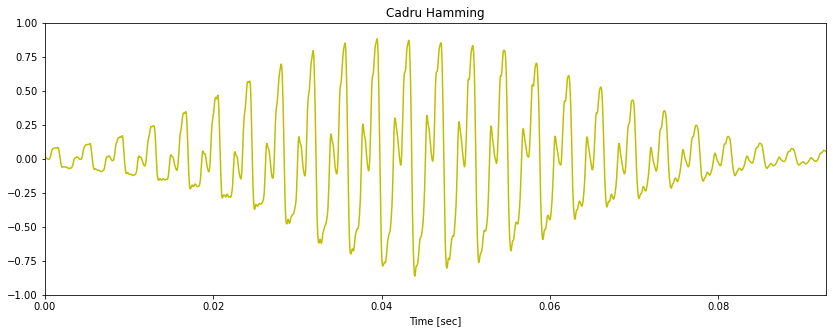

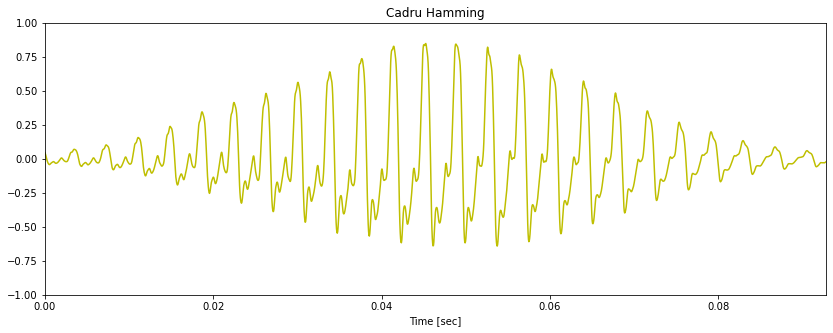

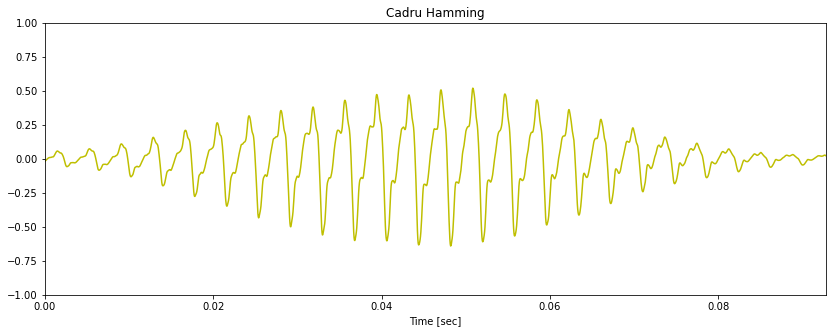

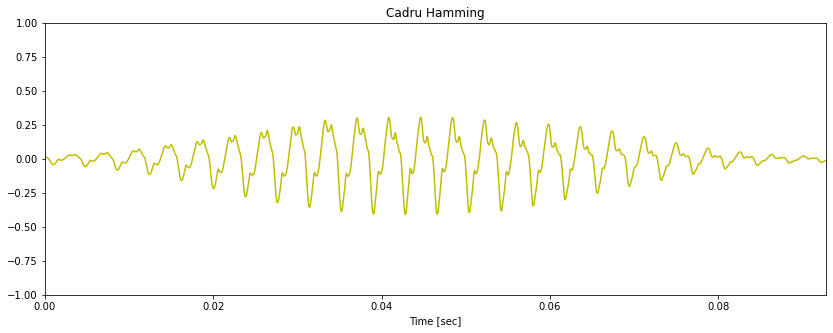

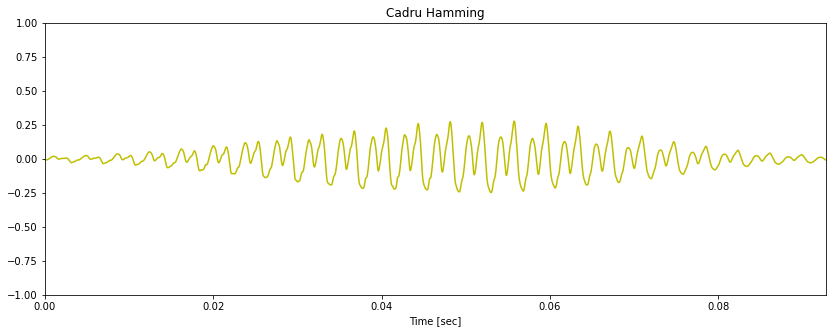

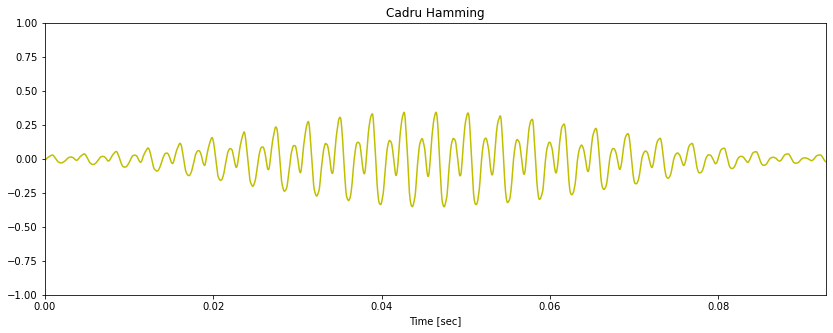

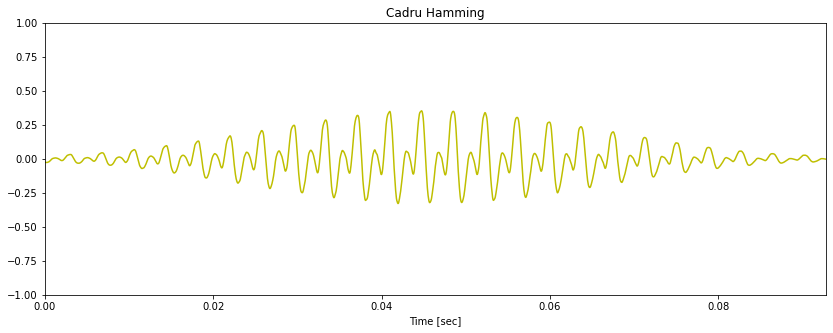

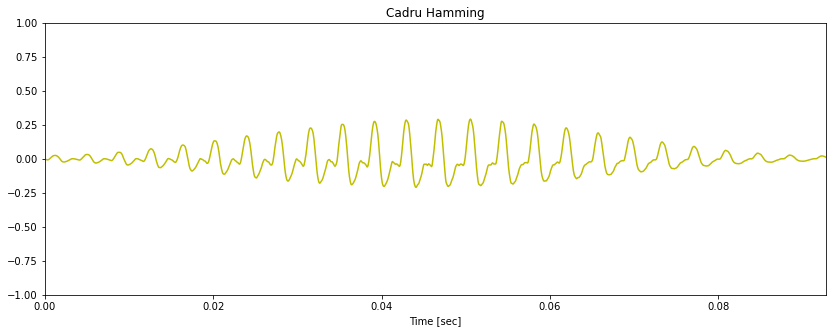

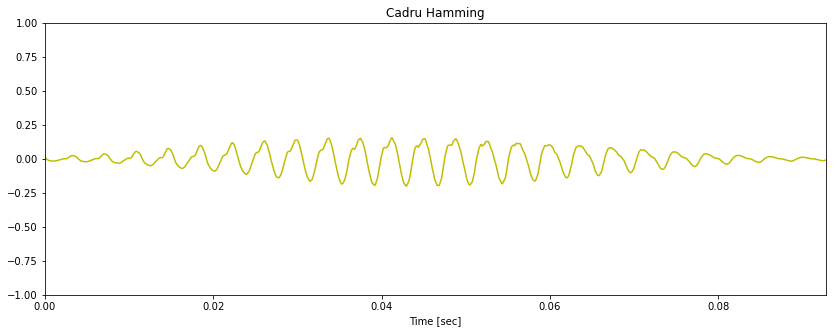

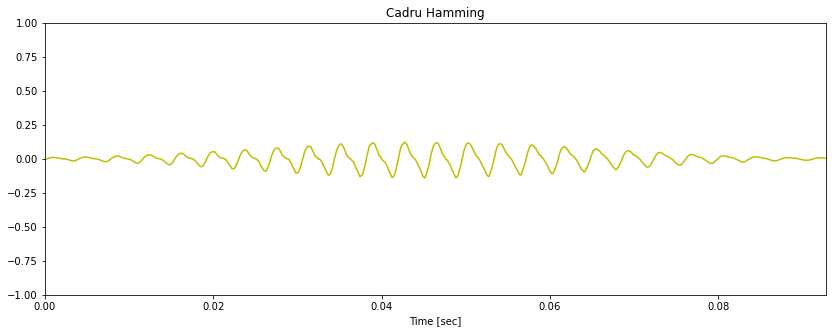

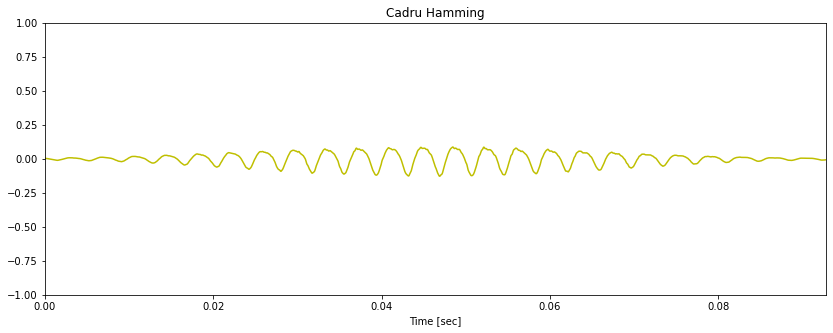

In [12]:
#Creare variabila timp pentru axa Ox
time_axis = np.arange(0, fereastra_fft)*1/sr

for k in range(numar_cadre_p):
    #Extragem doar un cadru din semnal
    cadru_curent_p = y[int(fereastra_fft*k*(1-p)):int(fereastra_fft*(k*(1-p)+1))]

    #Plot ferestre
    #plt.figure(figsize=(14,5))
    #plt.plot(time_axis, cadru_curent_p)
    #plt.title("Cadru de analiza: %d" %(k+1))
    #plt.xlabel("Time [sec]")
    #plt.xlim((0, time_axis[-1]))
    #plt.ylim((-1,1))
    
    #Generare fereastra Hamming
    fereastra_hamming = hamming(fereastra_fft)
    #Inmultesc fereastra hamming cu fiecare cadru in parte
    cadru_hamming = np.multiply(fereastra_hamming, cadru_curent_p)

    #Plot fereastra Hamming
    plt.figure(figsize=(14,5))
    plt.plot(time_axis, cadru_hamming, 'y')
    plt.title('Cadru Hamming')
    plt.xlabel("Time [sec]")
    plt.xlim((0, time_axis[-1]))
    plt.ylim((-1,1))

D:\Installed\Anaconda\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Cepstrum')

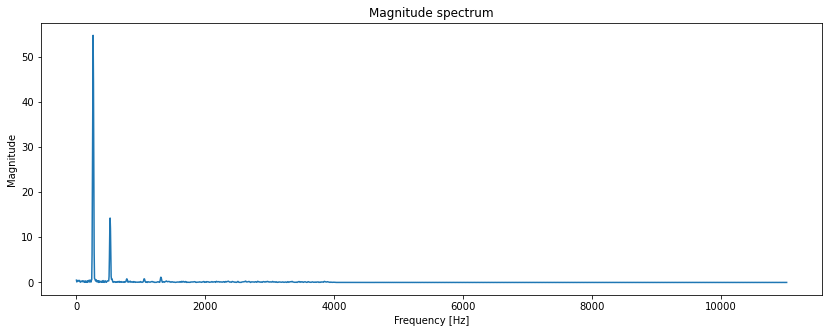

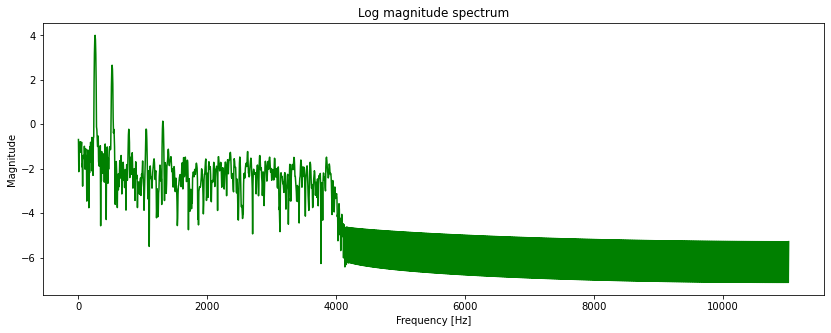

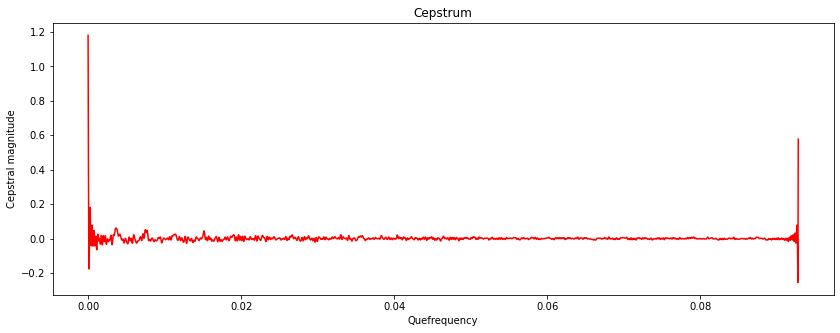

In [22]:
# 1) FFT
# Obs: Pentru a evita fenomenul de alias,
# nr de pct FFT trebuie sa fie mai mare decat lung ferestrei

nfft = 4096
fft_semnal = fft(cadru_hamming, nfft)

# 2) Modulul FFT = spectrul de amplitudini
abs_fft_semnal = np.abs(fft_semnal)
plt.figure(figsize=(14,5))
frequency_axis = np.arange(nfft//2)*sr/nfft
plt.plot(frequency_axis, abs_fft_semnal[nfft//2:][::-1],)
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.title("Magnitude spectrum")

# 3) Logaritm din modul de FFT
log_abs_fft_semnal = np.log(abs_fft_semnal)
plt.figure(figsize=(14,5))
plt.plot(frequency_axis, log_abs_fft_semnal[nfft//2:][::-1],'g')
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.title("Log magnitude spectrum")

# 4) Cepstrum = IFFT de logaritm din modul de FFT
semnal_cepstrum = ifft(log_abs_fft_semnal)
plt.figure(figsize=(14,5))
que_axis = np.arange(0, fereastra_fft)*1/sr
plt.plot(time_axis, semnal_cepstrum[nfft//2:][::-1],'r')
plt.xlabel("Quefrequency")
plt.ylabel("Cepstral magnitude")
plt.title("Cepstrum")